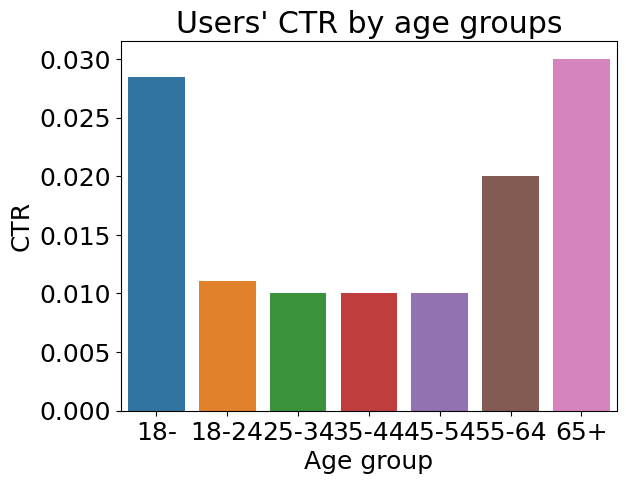

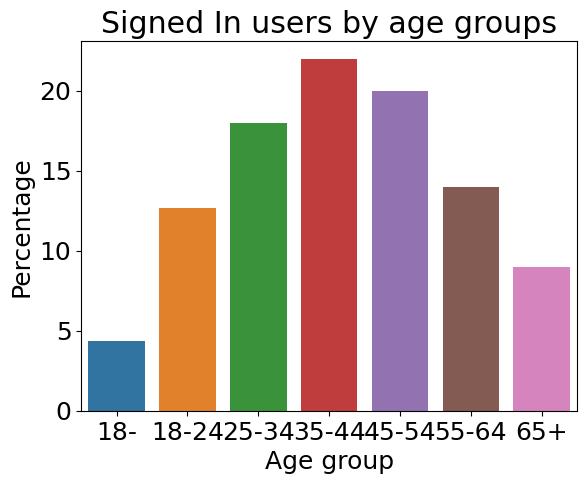

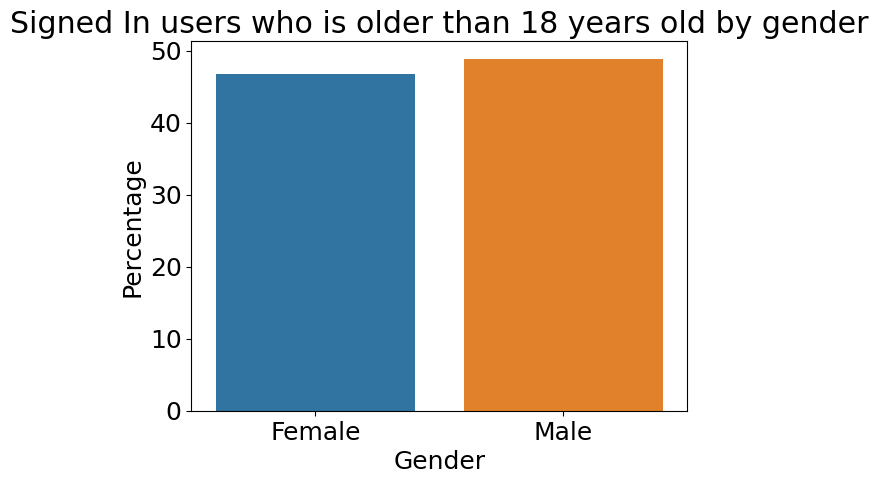

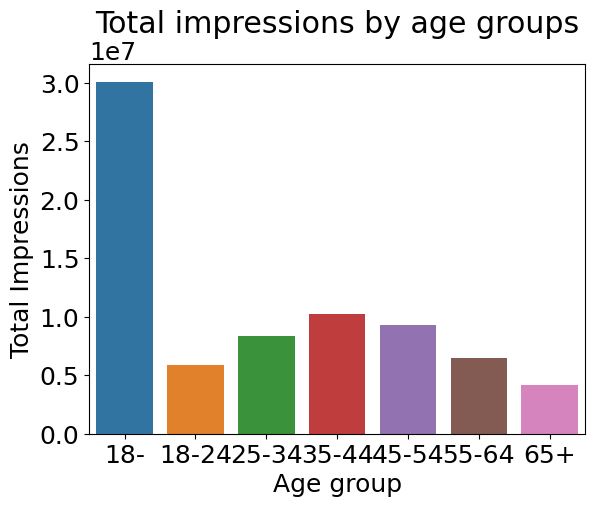

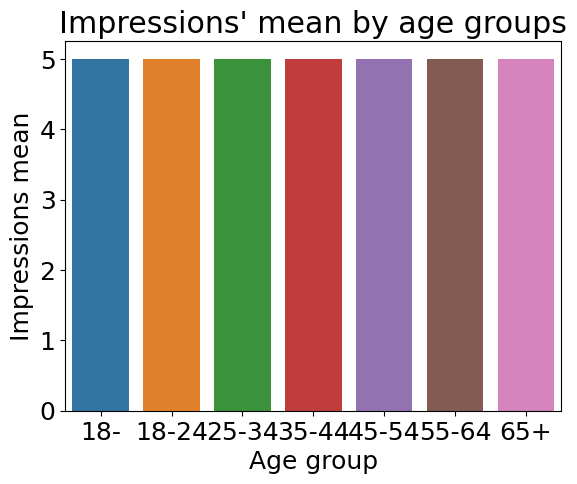

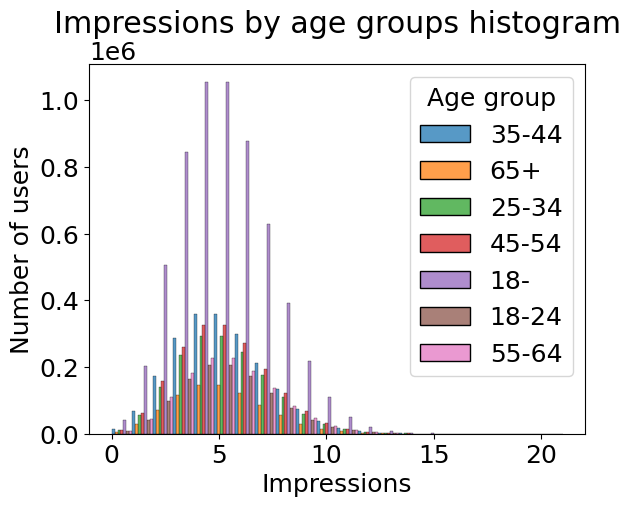

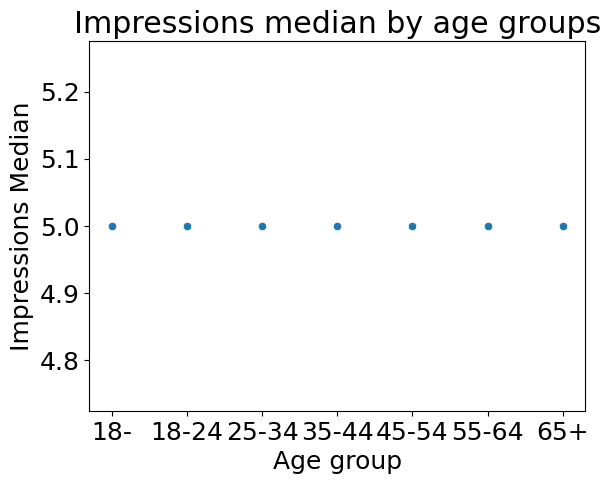

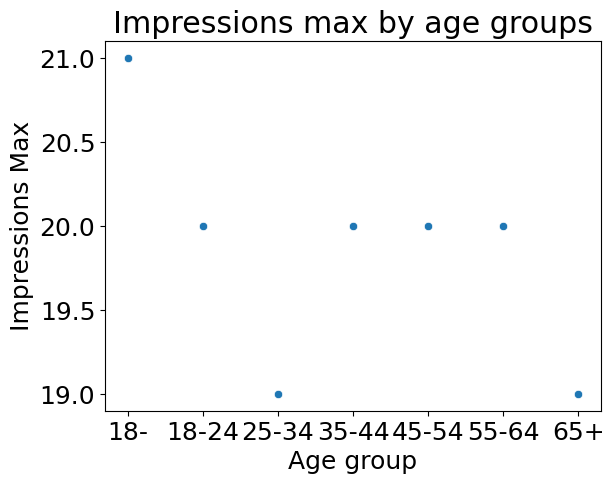

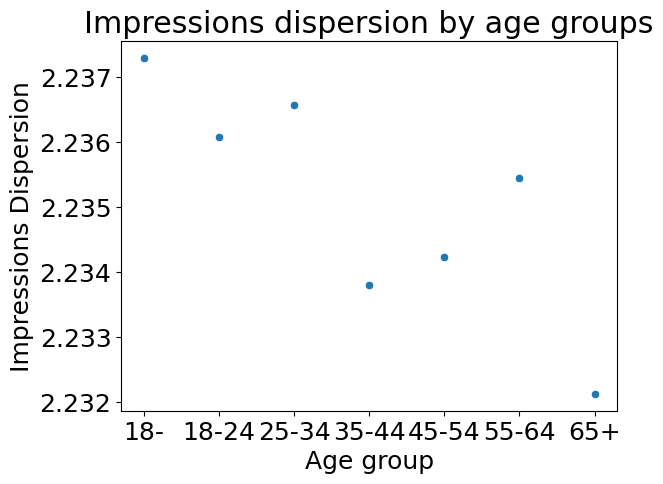

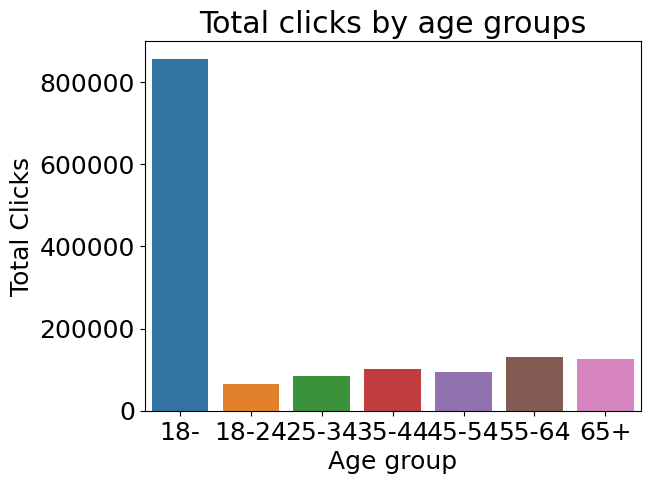

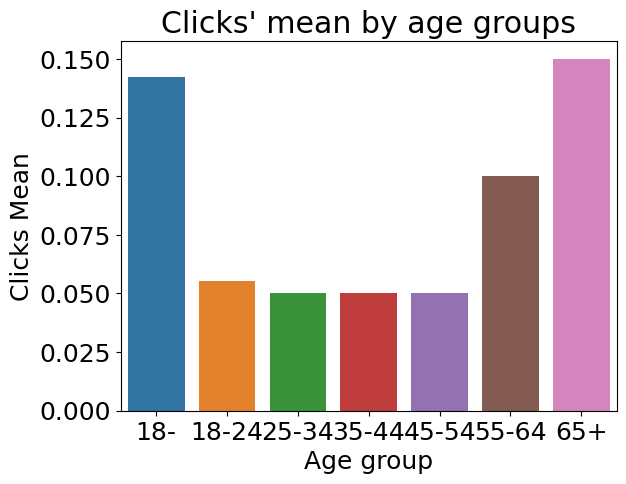

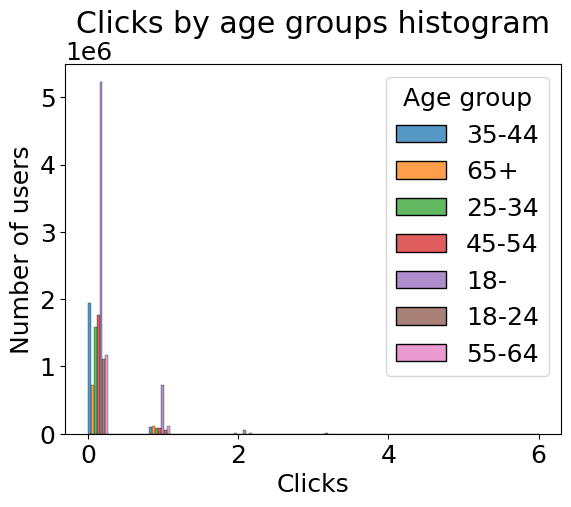

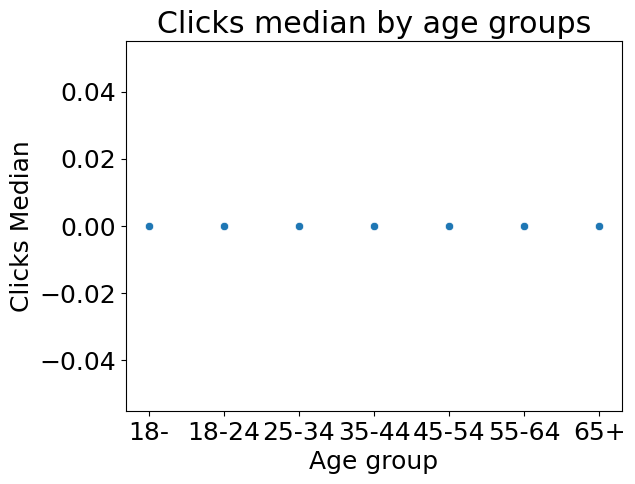

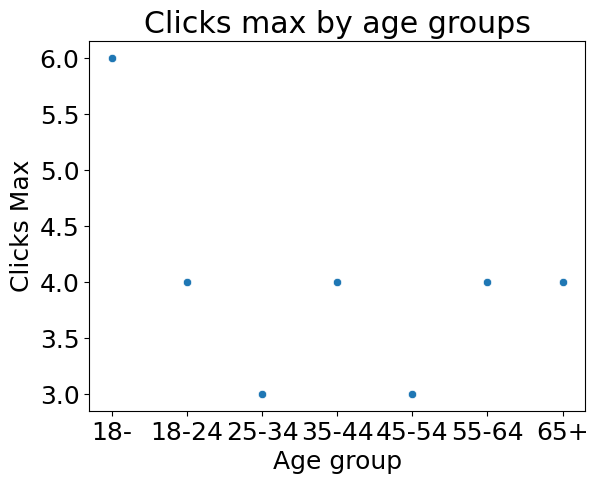

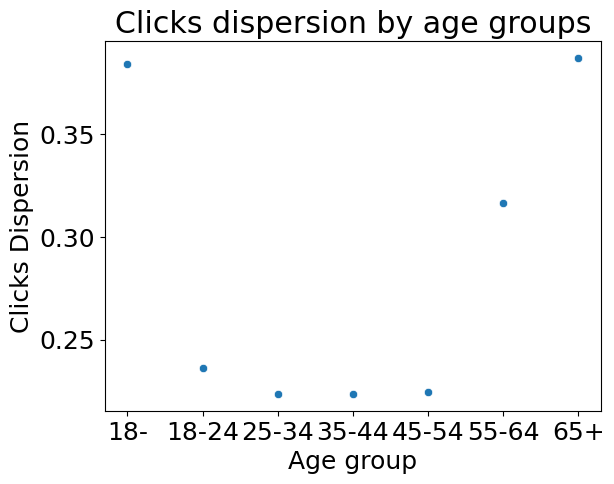

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

mpl.rcParams["font.size"] = 18

def divide_two_cols(df_sub):
    return df_sub['Clicks'].sum() / float(df_sub['Impressions'].sum())

df = pd.concat(
    map(pd.read_csv, ['dds_ch2_nyt/nyt1.csv', 'dds_ch2_nyt/nyt2.csv', 'dds_ch2_nyt/nyt3.csv', 'dds_ch2_nyt/nyt4.csv', 'dds_ch2_nyt/nyt5.csv'
     , 'dds_ch2_nyt/nyt6.csv', 'dds_ch2_nyt/nyt7.csv', 'dds_ch2_nyt/nyt8.csv', 'dds_ch2_nyt/nyt9.csv', 'dds_ch2_nyt/nyt10.csv', 'dds_ch2_nyt/nyt11.csv'     
      , 'dds_ch2_nyt/nyt12.csv', 'dds_ch2_nyt/nyt13.csv', 'dds_ch2_nyt/nyt14.csv', 'dds_ch2_nyt/nyt15.csv', 'dds_ch2_nyt/nyt16.csv', 'dds_ch2_nyt/nyt17.csv'    
      , 'dds_ch2_nyt/nyt18.csv'   , 'dds_ch2_nyt/nyt19.csv'   , 'dds_ch2_nyt/nyt20.csv'   , 'dds_ch2_nyt/nyt21.csv'   , 'dds_ch2_nyt/nyt22.csv'   , 'dds_ch2_nyt/nyt23.csv'   
      , 'dds_ch2_nyt/nyt24.csv'   , 'dds_ch2_nyt/nyt25.csv'   , 'dds_ch2_nyt/nyt26.csv'   , 'dds_ch2_nyt/nyt27.csv'   , 'dds_ch2_nyt/nyt28.csv'   , 'dds_ch2_nyt/nyt29.csv'   
      , 'dds_ch2_nyt/nyt30.csv'   , 'dds_ch2_nyt/nyt31.csv']), ignore_index=True)
# create a list of our conditions
conditions = [
    (df['Age'] < 18),
    (df['Age'] >= 18) & (df['Age'] <= 24),
    (df['Age'] >= 25) & (df['Age'] <= 34),
    (df['Age'] >= 35) & (df['Age'] <= 44),
    (df['Age'] >= 45) & (df['Age'] <= 54),
    (df['Age'] >= 55) & (df['Age'] <= 64),
    (df['Age'] >= 65)
    ]

# create a list of the values we want to assign for each condition
values = ['18-', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age group'] = np.select(conditions, values)
df.replace({'Gender': {0 :'Female'}}, inplace=True)
df.replace({'Gender': {1 :'Male'}}, inplace=True)

plt.show()

df2 = df.groupby('Age group').apply(divide_two_cols).reset_index(name='CTR')
plotCRT = sns.barplot(x='Age group', y= 'CTR', data=df2, order=['18-', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plotCRT.set(title = "Users' CTR by age groups")
plt.show()

signedInPercentageDF = df
signedInPercentageDF['Percentage'] = (df['Signed_In'] / 
                  df['Signed_In'].sum()) * 100


df3 = signedInPercentageDF.groupby('Age group')['Percentage'].sum().reset_index()
plotSignedIn = sns.barplot(x='Age group', y= 'Percentage', data=df3, order=['18-', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plotSignedIn.set(title = "Signed In users by age groups")
plt.show()

df4 = signedInPercentageDF.groupby(['Age group', 'Gender'])['Percentage'].sum().reset_index()
df4.drop(df4[df4['Age group'] == "18-"].index, inplace=True)
df5 = df4.groupby('Gender')['Percentage'].sum().reset_index()
plotSignedIn = sns.barplot(x='Gender', y= 'Percentage', data=df5)
plotSignedIn.set(title = "Signed In users who is older than 18 years old by gender")
plt.show()
 
dfImpressionsSum = df.groupby('Age group')['Impressions'].sum().reset_index(name = 'Total Impressions')
plotImpressionsSum =  sns.barplot(x='Age group', y= 'Total Impressions', data=dfImpressionsSum)
plotImpressionsSum.set(title = 'Total impressions by age groups')
plt.show()


dfImpressionsMean = df.groupby('Age group')['Impressions'].mean().reset_index(name = 'Impressions mean')
plotImpressionsMean =  sns.barplot(x='Age group', y= 'Impressions mean', data=dfImpressionsMean)
plotImpressionsMean.set(title = 'Impressions\' mean by age groups')
plt.show()

fig, ax = plt.subplots()
sns.histplot(
    data=df, x='Impressions', hue='Age group', multiple='dodge', bins = 22).set(title="Impressions by age groups histogram", ylabel = 'Number of users')
plt.show()

dfImpressionsMedian = df.groupby('Age group')['Impressions'].median().reset_index(name = 'Impressions Median')
plotImpressionsMedian =  sns.scatterplot(x='Age group', y= 'Impressions Median', data=dfImpressionsMedian)
plotImpressionsMedian.set(title = 'Impressions median by age groups')
plt.show()


dImpressionsMax = df.groupby('Age group')['Impressions'].max().reset_index(name = 'Impressions Max')
plotImpressionsMax =  sns.scatterplot(x='Age group', y= 'Impressions Max', data=dImpressionsMax)
plotImpressionsMax.set(title = 'Impressions max by age groups')
plt.show()

dfImpressionsDispersion = df.groupby('Age group')['Impressions'].std().reset_index(name = 'Impressions Dispersion')
plotImpressionsDispersion =  sns.scatterplot(x='Age group', y= 'Impressions Dispersion', data=dfImpressionsDispersion)
plotImpressionsDispersion.set(title = 'Impressions dispersion by age groups')
plt.show()

dfClicksSum = df.groupby('Age group')['Clicks'].sum().reset_index(name = 'Total Clicks')
plotClicksSum =  sns.barplot(x='Age group', y= 'Total Clicks', data=dfClicksSum)
plotClicksSum.set(title = 'Total clicks by age groups')
plt.show()

dfClicksMean = df.groupby('Age group')['Clicks'].mean().reset_index(name = 'Clicks Mean')
plotClicksMean =  sns.barplot(x='Age group', y= 'Clicks Mean', data=dfClicksMean)
plotClicksMean.set(title = 'Clicks\' mean by age groups')
plt.show()

fig, ax = plt.subplots()
sns.histplot(
    data=df, x='Clicks', hue='Age group', multiple='dodge', bins = 22).set(title="Clicks by age groups histogram", ylabel = 'Number of users')
plt.show()

dfClicksMedian = df.groupby('Age group')['Clicks'].median().reset_index(name = 'Clicks Median')
plotClicksMedian =  sns.scatterplot(x='Age group', y= 'Clicks Median', data=dfClicksMedian)
plotClicksMedian.set(title = 'Clicks median by age groups')
plt.show()

dfClicksMax = df.groupby('Age group')['Clicks'].max().reset_index(name = 'Clicks Max')
plotClicksMax =  sns.scatterplot(x='Age group', y= 'Clicks Max', data=dfClicksMax)
plotClicksMax.set(title = 'Clicks max by age groups')
plt.show()

dfClicksDispersion = df.groupby('Age group')['Clicks'].std().reset_index(name = 'Clicks Dispersion')
plotClicksDispersion =  sns.scatterplot(x='Age group', y= 'Clicks Dispersion', data=dfClicksDispersion)
plotClicksDispersion.set(title = 'Clicks dispersion by age groups')
plt.show()

